# Longitudinal Shower Profile

In [1]:
import hgc_testbeam as hgc
import numpy as np
import matplotlib.pyplot as plt

We want to plot median energy fraction in each layer in terms of $X_0$, so these are all the columns we need:

In [2]:
columns = ["event", "rechit_energy",  "rechit_X0", "rechit_layer"]

It is not necessary to look at all runs at once, since one run alone has already about 10000 events which gives us a small enough statistical uncertainty. We just want to extract one electron run with configuration 1 for each available energy.

In [3]:
selected_runlist = hgc.runlist.query("Particle == 'electron'").groupby("Energy").apply(lambda x : x.iloc[0])

Next we define a little function that plots the median longitudinal profile for a run. More comments in the code:

In [4]:
def plot_profile(run):
    """Plot longitudinal profile.
    """
    # Get the energy from the run information
    energy = hgc.run_info(run).Energy.values[0]
    # Load the run data
    df = hgc.load_run(run, columns=columns, verbosity=1)
    # Keep track of the X_0 that corresponds to the 28th layer (for later)
    x0_max = df.query("rechit_layer == 28").rechit_X0.values[0]

    # Sum the energy for each event and layer
    #df = df.groupby(["event", "rechit_X0"]).sum()
    # After groupby, the columns we used for the groupby are now the index of the DataFram.
    # We don't want that, so we turn them back into columns:
    #df = df.reset_index()
    # Next we groupby the discrete samplings of X_0 to find the median across all events
    #df = df.groupby("rechit_X0").median()
    # To compare profiles for different beam energies,
    # it is useful to normalize it such that they can be better compared
    #df["rechit_energy"] = df["rechit_energy"] #/ df["rechit_energy"].sum()
    
    df = df.groupby("rechit_X0").sum()

    # and again we would like to reset the index to a column
    df = df.reset_index()
    # we limit ourselves to the "electromagnetc" calorimeter in configuration 1 (the first 28 layers)
    df = df[df.rechit_X0 <= x0_max]
    # Finally, the plot
    plt.plot(df.rechit_X0, df.rechit_energy, "o-", markersize=2, label=str(energy) + " GeV")

Finally, we plot the profile for every third energy such that the plot doeos not get too crowded.

Loading rechitntupler/hits from run 436... Done.
Loading rechitntupler/hits from run 466... Done.
Loading rechitntupler/hits from run 493... Done.
Loading rechitntupler/hits from run 405... Done.


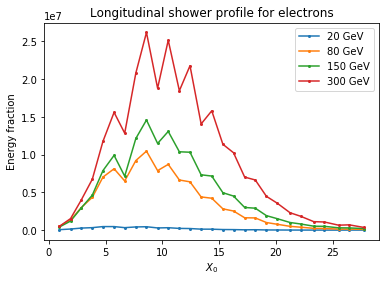

In [5]:
plt.figure()
for run in selected_runlist.Run[::3]:
    plot_profile(run)
plt.legend(loc="upper right")
plt.xlabel(r'$X_0$')
plt.ylabel("Energy fraction")
plt.title("Longitudinal shower profile for electrons")
plt.show()

We observe the trend we expect: electrons with higher energy generally go deeper into the calorimeter.